In [1]:
# Importing necessary libraries and functions
import os
import numpy as np
import pickle
from statistics import stdev, StatisticsError


from simulation.graph_utils import convert_maze
from simulation.simulation import Simulation, Algorithm

In [2]:
def calculate_stats(data):
    if len(data) > 1:
        try:
            avg = np.mean(data)
        except:
            avg = 0
        try:
            std_dev = stdev(data)
        except:
            std_dev = 0  # Handle cases where stdev can't be computed
    else:
        avg = 0
        std_dev = 0
    return avg, std_dev

In [ ]:
# Base Mazes Path
base_path = "mazes/"

# Choose maze size
maze_type_path = "10_by_10"
# maze_type_path = "20_by_20"
# maze_type_path = "30_by_30"
# maze_type_path = "40_by_40"
# maze_type_path = "50_by_50"
# maze_type_path = "100_by_100"

mazes_path = base_path + maze_type_path

# Define max number of agents
max_agents = 40
results = []

for agents in range(1,max_agents+1):
    count = 0
    agent_steps = []
    agent_pioneer_steps = []
    fraction_explored = []
    fraction_pioneer_explored = []
    for root, dirs, files in os.walk(mazes_path):
        for file in files:
            maze_path = os.path.join(root, file)
            graph, rows, columns = convert_maze(maze_path)
            starting_node_id = f"{rows},{columns}"
            is_maze = True
            
            simulation = Simulation(
                algorithm=Algorithm.SELF,
                n_agents=agents,
                graph=graph,
                starting_node_id=starting_node_id,
                is_maze=is_maze,
            )
            
            simulation.simulate(False,False)
            agent_steps.append(simulation.total_steps/ agents if agents > 0 else 0)
            agent_pioneer_steps.append(simulation.pioneer_steps)
            fraction_explored.append(simulation.fraction_explored * 100)
            fraction_pioneer_explored.append(simulation.fraction_pioneer * 100)
            count += 1
    print(agents)
    
    # Calculate average and standard deviation for steps and pioneer steps
    avg_steps, std_steps = calculate_stats(agent_steps)
    avg_pioneer_steps, std_pioneer_steps = calculate_stats(agent_pioneer_steps)
    avg_fraction, std_fraction = calculate_stats(fraction_explored)
    avg_fraction_pioneer, std_fraction_pioneer = calculate_stats(fraction_pioneer_explored)
    
    # Append the results to the results list
    results.append({
        'agents': agents,
        'avg_steps': avg_steps,
        'std_steps': std_steps,
        'avg_pioneer_steps': avg_pioneer_steps,
        'std_pioneer_steps': std_pioneer_steps,
        'avg_fraction':avg_fraction,
        'std_fraction':std_fraction,
        'avg_fraction_pioneer': avg_fraction_pioneer,
        'std_fraction_pioneer': std_fraction_pioneer,
    })

print(results)
            


In [ ]:
results_dir = "results"
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

In [ ]:
# Save results in pickle

with open(f"results/{maze_type_path}_result.pkl", 'wb') as f:
    pickle.dump(results, f)

In [ ]:
# Load results

maze_type_path = "10_by_10"
# maze_type_path = "20_by_20"
# maze_type_path = "30_by_30"
# maze_type_path = "40_by_40"
# maze_type_path = "50_by_50"
# maze_type_path = "100_by_100"


with open(f"results/{maze_type_path}_result.pkl", 'rb') as f:
    results = pickle.load(f)

print(results)

In [ ]:
# Plot Steps Analysis

import matplotlib.pyplot as plt
from IPython.display import SVG, display
import numpy as np

# Assuming 'results' is already populated with the data as described earlier

# Extract data from 'results' list
agents = [result['agents'] for result in results]
avg_steps = [result['avg_steps'] for result in results]
std_steps = [result['std_steps'] for result in results]
avg_pioneer_steps = [result['avg_pioneer_steps'] for result in results]

# Create the line plots
plt.figure(figsize=(10, 6))

# Plotting average steps
plt.plot(agents, avg_steps, label='Average Steps', marker='.', color="blue")

# Plotting average pioneer steps
plt.plot(agents, avg_pioneer_steps, label='Average Pioneer Steps', marker='o', color="green")

# Plotting standard deviation of steps
plt.plot(agents, std_steps, label='Standard Deviation - Average Steps', linestyle="--", marker='s', color="red")

# Adding labels and legend
plt.xlabel('Number of Agents')
plt.ylabel('Steps')
plt.title('Average Steps, Standard Deviation, and Pioneer Steps vs. Number of Agents')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()

# Save the plot as SVG
file_path = f'results/steps_std_pioneer_vs_agents_{maze_type_path}.svg'
plt.savefig(file_path, format='svg')

# Display the SVG image
display(SVG(filename=file_path))


In [ ]:
# Plot Fractio Analysis

import matplotlib.pyplot as plt
from IPython.display import SVG, display
import numpy as np

# Assuming 'results' is already populated with the data as described earlier

# Extract data from 'results' list
agents = [result['agents'] for result in results]
avg_fraction = [result['avg_fraction'] for result in results]
avg_fraction_pioneer = [result['avg_fraction_pioneer'] for result in results]


# Create the line plots
plt.figure(figsize=(10, 6))

# Plotting average fraction
plt.plot(agents, avg_fraction, label='Fraction of Maze Explored', marker='.', color="blue")

# Plotting average fraction
plt.plot(agents, avg_fraction_pioneer, label='Fraction of Maze Explored when pioneer arrives', linestyle='--', marker='o', color="green")

# Adding labels and legend
plt.xlabel('Number of Agents')
plt.ylabel('Fraction of Maze Explored(%)')
plt.title('Maze Explored Fraction vs. Number of Agents')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()

# Save the plot as SVG
file_path = f'results/fraction_vs_agents_{maze_type_path}.svg'
plt.savefig(file_path, format='svg')

# Display the SVG image
display(SVG(filename=file_path))


In [ ]:
# TWO INTERVAL
# Base Mazes Path
base_path = "mazes/"

# Choose maze size
# maze_type_path = "10_by_10"
# maze_type_path = "20_by_20"
# maze_type_path = "30_by_30"
maze_type_path = "40_by_40"
# maze_type_path = "50_by_50"
# maze_type_path = "100_by_100"

mazes_path = base_path + maze_type_path

# Define max number of agents
max_agents = 40
results = []

for agents in range(1,max_agents+1):
    count = 0
    agent_steps = []
    agent_pioneer_steps = []
    fraction_explored = []
    fraction_pioneer_explored = []
    for root, dirs, files in os.walk(mazes_path):
        for file in files:
            maze_path = os.path.join(root, file)
            graph, rows, columns = convert_maze(maze_path)
            starting_node_id = f"{rows},{columns}"
            is_maze = True

            simulation = Simulation(
                algorithm=Algorithm.TWO_INTERVAL,
                n_agents=agents,
                graph=graph,
                starting_node_id=starting_node_id,
                is_maze=is_maze,
            )
            
            simulation.simulate(False,False)
            agent_steps.append(simulation.total_steps/ agents if agents > 0 else 0)
            agent_pioneer_steps.append(simulation.pioneer_steps)
            fraction_explored.append(simulation.fraction_explored * 100)
            fraction_pioneer_explored.append(simulation.fraction_pioneer * 100)
            count += 1
    print(agents)
    
    # Calculate average and standard deviation for steps and pioneer steps
    avg_steps, std_steps = calculate_stats(agent_steps)
    avg_pioneer_steps, std_pioneer_steps = calculate_stats(agent_pioneer_steps)
    avg_fraction, std_fraction = calculate_stats(fraction_explored)
    avg_fraction_pioneer, std_fraction_pioneer = calculate_stats(fraction_pioneer_explored)
    
    # Append the results to the results list
    results.append({
        'agents': agents,
        'avg_steps': avg_steps,
        'std_steps': std_steps,
        'avg_pioneer_steps': avg_pioneer_steps,
        'std_pioneer_steps': std_pioneer_steps,
        'avg_fraction':avg_fraction,
        'std_fraction':std_fraction,
        'avg_fraction_pioneer': avg_fraction_pioneer,
        'std_fraction_pioneer': std_fraction_pioneer,
    })

print(results)
            


In [ ]:
# Save results in pickle

with open(f"results/{maze_type_path}_two_interval_result.pkl", 'wb') as f:
    pickle.dump(results, f)

In [ ]:
# Load results

maze_type_path = "10_by_10"
# maze_type_path = "20_by_20"
# maze_type_path = "30_by_30"
# maze_type_path = "40_by_40"
# maze_type_path = "50_by_50"
# maze_type_path = "100_by_100"


with open(f"results/{maze_type_path}_result.pkl", 'rb') as f:
    one_interval_results = pickle.load(f)

with open(f"results/{maze_type_path}_two_interval_result.pkl", 'rb') as f:
    two_interval_results = pickle.load(f)

In [ ]:
# Plot Steps Analysis

import matplotlib.pyplot as plt
from IPython.display import SVG, display
import numpy as np


agents = [result['agents'] for result in one_interval_results]
i1_avg_steps = [result['avg_steps'] for result in one_interval_results]
i1_std_steps = [result['std_steps'] for result in one_interval_results]
i1_avg_pioneer_steps = [result['avg_pioneer_steps'] for result in one_interval_results]
i2_avg_steps = [result['avg_steps'] for result in two_interval_results]
i2_std_steps = [result['std_steps'] for result in two_interval_results]
i2_avg_pioneer_steps = [result['avg_pioneer_steps'] for result in two_interval_results]

# Create the line plots
plt.figure(figsize=(10, 6))

# Plotting 1 interval
line1, = plt.plot(agents, i1_avg_steps, label='1I: Average Steps', marker='.', color="blue",)
line2, = plt.plot(agents, i1_avg_pioneer_steps, label='1I: Average Pioneer Steps', marker='d', color="blue")
line3, = plt.plot(agents, i1_std_steps, label='1I: Standard Deviation - Average Steps', linestyle='--', marker='s', color="blue")

# Plotting 1 interval
line4, = plt.plot(agents, i2_avg_steps, label='2I: Average Steps', marker='.', color="red")
line5, = plt.plot(agents, i2_avg_pioneer_steps, label='2I: Average Pioneer Steps', marker='d', color="red")
line6, = plt.plot(agents, i2_std_steps, label='2I: Standard Deviation - Average Steps', linestyle='--', marker='s', color="red")

# Adding labels and legend
plt.xlabel('Number of Agents')
plt.ylabel('Steps')
plt.title('Average Steps, Standard Deviation, and Pioneer Steps vs. Number of Agents')
# plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()

# Save the plot as SVG
file_path = f'results/steps_std_pioneer_vs_agents_{maze_type_path}_two_interval.svg'
plt.savefig(file_path, format='svg')

# Display the SVG image
display(SVG(filename=file_path))


In [ ]:
# Plot Legend

# Create a separate figure for the legend
fig_legend = plt.figure(figsize=(4, 2))
legend = fig_legend.legend(handles=[line1, line2, line3, line4, line5, line6], loc='center', ncol=1)
fig_legend.canvas.draw()

# Save the legend as SVG
legend_file_path = f'results/legend_steps_std_pioneer_vs_agents_two_interval.svg'
fig_legend.savefig(legend_file_path, format='svg')

# Display the SVG image of the legend
display(SVG(filename=legend_file_path))

In [ ]:
# Plot Fractio Analysis

import matplotlib.pyplot as plt
from IPython.display import SVG, display
import numpy as np

# Assuming 'results' is already populated with the data as described earlier

# Extract data from 'results' list
agents = [result['agents'] for result in results]

i1_avg_fraction = [result['avg_fraction'] for result in one_interval_results]
i1_avg_fraction_pioneer = [result['avg_fraction_pioneer'] for result in one_interval_results]
i2_avg_fraction = [result['avg_fraction'] for result in two_interval_results]
i2_avg_fraction_pioneer = [result['avg_fraction_pioneer'] for result in two_interval_results]


# Create the line plots
plt.figure(figsize=(10, 6))


# Plotting average fraction
line1, = plt.plot(agents, i1_avg_fraction, label='1I: Fraction of Maze Explored',  marker='.', color="blue")
line2, = plt.plot(agents, i1_avg_fraction_pioneer, label='1I: Fraction of Maze Explored when pioneer arrives', linestyle='--', marker='o', color="blue")
line3, = plt.plot(agents, i2_avg_fraction, label='2I: Fraction of Maze Explored',  marker='.', color="red")
line4, = plt.plot(agents, i2_avg_fraction_pioneer, label='2I: Fraction of Maze Explored when pioneer arrives', linestyle='--', marker='o', color="red")

# Adding labels and legend
plt.xlabel('Number of Agents')
plt.ylabel('Fraction of Maze Explored(%)')
plt.title('Maze Explored Fraction vs. Number of Agents')
# plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()

# Save the plot as SVG
file_path = f'results/fraction_vs_agents_{maze_type_path}_two_interval.svg'
plt.savefig(file_path, format='svg')

# Display the SVG image
display(SVG(filename=file_path))


In [ ]:
# Plot Legend

# Create a separate figure for the legend
fig_legend = plt.figure(figsize=(4, 2))
legend = fig_legend.legend(handles=[line1, line2, line3, line4], loc='center', ncol=1)
fig_legend.canvas.draw()

# Save the legend as SVG
legend_file_path = f'results/legend_fraction_vs_agents_two_interval.svg'
fig_legend.savefig(legend_file_path, format='svg')

# Display the SVG image of the legend
display(SVG(filename=legend_file_path))

In [3]:
# Tarry
# Base Mazes Path
base_path = "mazes/"

# Choose maze size
# maze_type_path = "10_by_10"
# maze_type_path = "20_by_20"
# maze_type_path = "30_by_30"
maze_type_path = "40_by_40"
# maze_type_path = "50_by_50"
# maze_type_path = "100_by_100"

mazes_path = base_path + maze_type_path

# Define max number of agents
max_agents = 40
results = []

for agents in range(1,max_agents+1):
    count = 0
    agent_steps = []
    agent_pioneer_steps = []
    fraction_explored = []
    fraction_pioneer_explored = []
    for root, dirs, files in os.walk(mazes_path):
        for file in files:
            maze_path = os.path.join(root, file)
            graph, rows, columns = convert_maze(maze_path)
            starting_node_id = f"{rows},{columns}"
            is_maze = True

            simulation = Simulation(
                algorithm=Algorithm.TARRY,
                n_agents=agents,
                graph=graph,
                starting_node_id=starting_node_id,
                is_maze=is_maze,
            )
            
            simulation.simulate(False,False)
            agent_steps.append(simulation.total_steps/ agents if agents > 0 else 0)
            agent_pioneer_steps.append(simulation.pioneer_steps)
            fraction_explored.append(simulation.fraction_explored * 100)
            fraction_pioneer_explored.append(simulation.fraction_pioneer * 100)
            count += 1
    print(agents)
    
    # Calculate average and standard deviation for steps and pioneer steps
    avg_steps, std_steps = calculate_stats(agent_steps)
    avg_pioneer_steps, std_pioneer_steps = calculate_stats(agent_pioneer_steps)
    avg_fraction, std_fraction = calculate_stats(fraction_explored)
    avg_fraction_pioneer, std_fraction_pioneer = calculate_stats(fraction_pioneer_explored)
    
    # Append the results to the results list
    results.append({
        'agents': agents,
        'avg_steps': avg_steps,
        'std_steps': std_steps,
        'avg_pioneer_steps': avg_pioneer_steps,
        'std_pioneer_steps': std_pioneer_steps,
        'avg_fraction':avg_fraction,
        'std_fraction':std_fraction,
        'avg_fraction_pioneer': avg_fraction_pioneer,
        'std_fraction_pioneer': std_fraction_pioneer,
    })

print(results)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
[{'agents': 1, 'avg_steps': 1635.072, 'std_steps': 732.3882501870495, 'avg_pioneer_steps': 1635.072, 'std_pioneer_steps': 732.3882501870495, 'avg_fraction': 66.8365, 'std_fraction': 23.251834259596446, 'avg_fraction_pioneer': 66.8365, 'std_fraction_pioneer': 23.251834259596446}, {'agents': 2, 'avg_steps': 1211.228, 'std_steps': 311.5371786331171, 'avg_pioneer_steps': 952.544, 'std_pioneer_steps': 359.40780171796905, 'avg_fraction': 75.70175, 'std_fraction': 19.47107366456982, 'avg_fraction_pioneer': 75.689, 'std_fraction_pioneer': 19.47915385713558}, {'agents': 3, 'avg_steps': 1114.432, 'std_steps': 259.9716629736948, 'avg_pioneer_steps': 843.32, 'std_pioneer_steps': 321.66759514608907, 'avg_fraction': 80.477, 'std_fraction': 18.162270460300178, 'avg_fraction_pioneer': 80.45625, 'std_fraction_pioneer': 18.174035464716997}, {'agents': 4, 'avg_steps': 1043.964, 'std_steps': 251.

In [4]:
# Save results in pickle

with open(f"results/{maze_type_path}_tarry_result.pkl", 'wb') as f:
    pickle.dump(results, f)

In [5]:
# Load results

# maze_type_path = "10_by_10"
# maze_type_path = "20_by_20"
# maze_type_path = "30_by_30"
maze_type_path = "40_by_40"
# maze_type_path = "50_by_50"
# maze_type_path = "100_by_100"


with open(f"results/{maze_type_path}_result.pkl", 'rb') as f:
    one_interval_results = pickle.load(f)

with open(f"results/{maze_type_path}_two_interval_result.pkl", 'rb') as f:
    two_interval_results = pickle.load(f)
    
with open(f"results/{maze_type_path}_tarry_result.pkl", 'rb') as f:
    tarry_results = pickle.load(f)

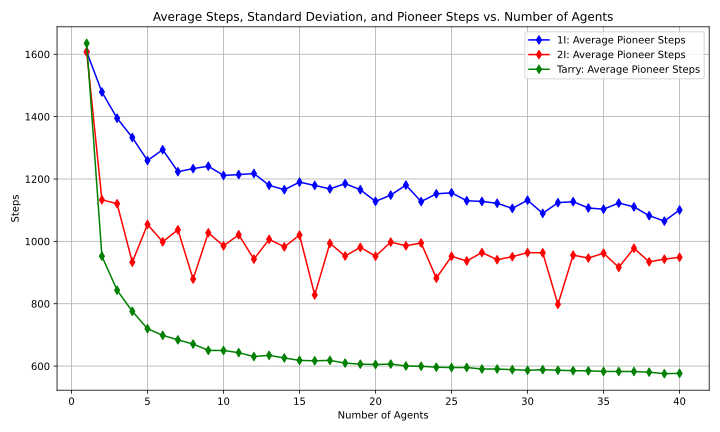

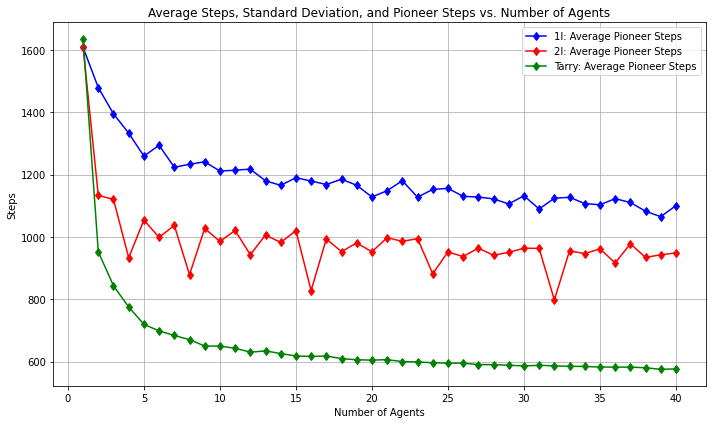

In [6]:
# Plot Steps Analysis

import matplotlib.pyplot as plt
from IPython.display import SVG, display
import numpy as np


agents = [result['agents'] for result in one_interval_results]
i1_avg_pioneer_steps = [result['avg_pioneer_steps'] for result in one_interval_results]
i2_avg_pioneer_steps = [result['avg_pioneer_steps'] for result in two_interval_results]
tarry_avg_pioneer_steps = [result['avg_pioneer_steps'] for result in tarry_results]

# Create the line plots
plt.figure(figsize=(10, 6))

# Plotting 1 interval
line1, = plt.plot(agents, i1_avg_pioneer_steps, label='1I: Average Pioneer Steps', marker='d', color="blue")

# Plotting 2 interval
line2, = plt.plot(agents, i2_avg_pioneer_steps, label='2I: Average Pioneer Steps', marker='d', color="red")

# Plotting Tarry
line3, = plt.plot(agents, tarry_avg_pioneer_steps, label='Tarry: Average Pioneer Steps', marker='d', color="green")

# Adding labels and legend
plt.xlabel('Number of Agents')
plt.ylabel('Steps')
plt.title('Average Steps, Standard Deviation, and Pioneer Steps vs. Number of Agents')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()

# Save the plot as SVG
file_path = f'results/steps_std_pioneer_vs_agents_{maze_type_path}_tarry.svg'
plt.savefig(file_path, format='svg')

# Display the SVG image
display(SVG(filename=file_path))


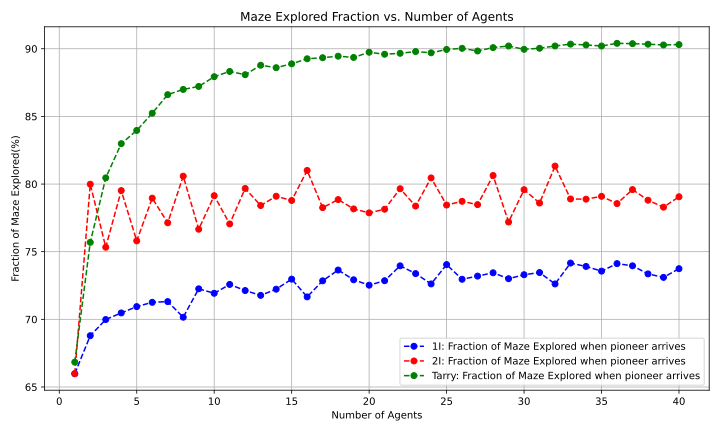

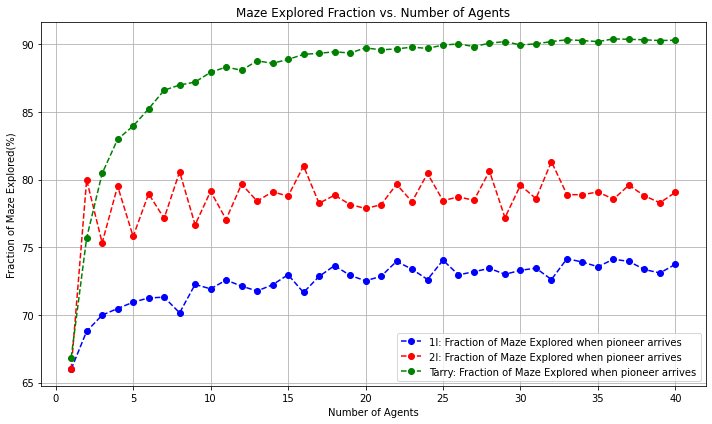

In [7]:
# Plot Fractio Analysis

import matplotlib.pyplot as plt
from IPython.display import SVG, display
import numpy as np

# Assuming 'results' is already populated with the data as described earlier

# Extract data from 'results' list
agents = [result['agents'] for result in tarry_results]

i1_avg_fraction_pioneer = [result['avg_fraction_pioneer'] for result in one_interval_results]
i2_avg_fraction_pioneer = [result['avg_fraction_pioneer'] for result in two_interval_results]
tarry_avg_fraction_pioneer = [result['avg_fraction_pioneer'] for result in tarry_results]


# Create the line plots
plt.figure(figsize=(10, 6))


# Plotting average fraction
line1, = plt.plot(agents, i1_avg_fraction_pioneer, label='1I: Fraction of Maze Explored when pioneer arrives', linestyle='--', marker='o', color="blue")
line2, = plt.plot(agents, i2_avg_fraction_pioneer, label='2I: Fraction of Maze Explored when pioneer arrives', linestyle='--', marker='o', color="red")
line3, = plt.plot(agents, tarry_avg_fraction_pioneer, label='Tarry: Fraction of Maze Explored when pioneer arrives', linestyle='--', marker='o', color="green")

# Adding labels and legend
plt.xlabel('Number of Agents')
plt.ylabel('Fraction of Maze Explored(%)')
plt.title('Maze Explored Fraction vs. Number of Agents')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()

# Save the plot as SVG
file_path = f'results/fraction_vs_agents_{maze_type_path}_tarry.svg'
plt.savefig(file_path, format='svg')

# Display the SVG image
display(SVG(filename=file_path))
